<a href="https://colab.research.google.com/github/priyadwivedi20/football_goal_analysis/blob/main/ball_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt



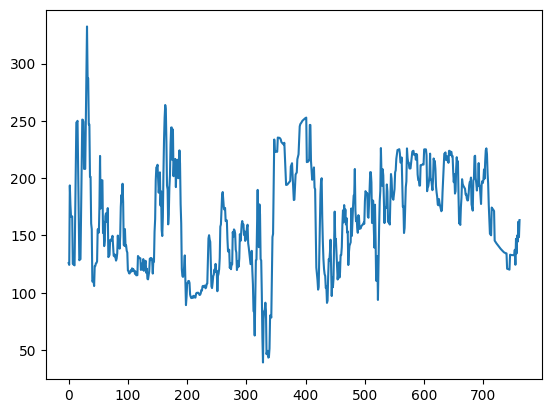

In [3]:
# read the pickle file
with open('ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

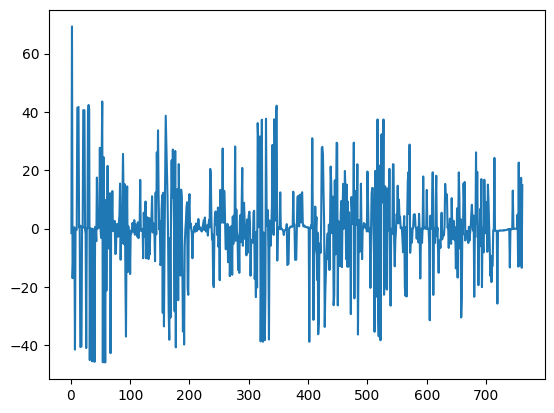

In [4]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])